# Naver Blog Review Preprocessing 
* 한 개의 키워드에 대한 정제 코드
* 정규표현식 수정 
* 정제 후 각 블로그 글 문장단위로 dataframe의 한 row로 할당해줌
* 중복값 제거 및 문장 길이 분포 확인 후 특정 길이로 제한 처리해줌
* 정제 후 Csv 저장까지 

## 사용 라이브러리 설치

[soynlp](https://github.com/lovit/soynlp)

In [1]:
# 한글 문장 분리기 
!pip install kss # korean sentence splitter

# 한글 맞춤법 검사기
!pip install requests # py-hanspell 의존 라이브러리
!pip install git+https://github.com/ssut/py-hanspell.git # py-hanspell
!pip install py-hangul-checker # py-hangul-checker

# 한글 띄어쓰기 교정기 
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
    
# 고유명사 추출에 용이한 토크나이저
!pip install soynlp

!pip install soyspacing

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-1fpj0fe8
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-1fpj0fe8
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-hq073bng
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-hq073bng
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


## 파일 경로 설정 

In [2]:
!mkdir -p ~/jungcheck/DataPreprocessing    
!pwd    
!cd ~/jungcheck    
!mkdir -p ./data/naver_review  

/home/aiffel-dj19/jungcheck/DataPreprocessing


In [3]:
# 현재 경로 확인 
!pwd

/home/aiffel-dj19/jungcheck/DataPreprocessing


아래 tree 명령어로 상위 폴더(jungcheck)내 파일 구성을 볼 수 있습니다.    

In [4]:
# jungcheck 폴더내 경로 확인 
!tree -L 3 -N ./data/naver_review  

./data/naver_review
├── 수통골
│   ├── 수통골 관광 대전.csv
│   ├── 수통골 여행 대전.csv
│   ├── 수통골 여행 후기.csv
│   ├── 수통골 관광 후기.csv
│   └── 수통골 여행 주말에.csv
├── 대청호
│   ├── 대청호반 관광 후기.csv
│   ├── 대청호반 관광 대전.csv
│   ├── 대청호반 여행 대전.csv
│   ├── 대청호반 여행 후기.csv
│   ├── 대청호반 관광 주말에.csv
│   └── 대청호반 여행 주말에.csv
├── 장태산
│   ├── 장태산휴양림 여행 후기.csv
│   ├── 장태산휴양림 관광 후기.csv
│   ├── 장태산휴양림 관광 대전.csv
│   ├── 장태산휴양림 여행 대전.csv
│   ├── 장태산휴양림 관광 주말에.csv
│   └── 장태산휴양림 여행 주말에.csv
├── 성심당
│   ├── 성심당 여행 후기.csv
│   ├── 성심당 여행 대전.csv
│   ├── 성심당 관광 대전.csv
│   ├── 성심당 관광 후기.csv
│   ├── 성심당 여행 주말에.csv
│   └── 성심당 관광 주말에.csv
├── 계족산
│   ├── 계족산황톳길 여행 대전.csv
│   ├── 계족산황톳길 관광 대전.csv
│   ├── 계족산황톳길 여행 후기.csv
│   ├── 계족산황톳길 관광 후기.csv
│   ├── 계족산황톳길 여행 주말에.csv
│   └── 계족산황톳길 관광 주말에.csv
├── 오월드
│   ├── 오월드 여행 대전.csv
│   ├── 오월드 관광 주말에.csv
│   └── 오월드 여행 주말에.csv
├── 동춘당
│   ├── 동춘당 관광 대전.csv
│   ├── 동춘당 관광 후기.csv
│   ├── 동춘당 여행 대전.csv
│   ├── 동춘당 여행 후기.csv
│   ├── 동춘당 여행 주말에.csv
│   └── 동춘당 관광 주말에.csv
├── 유성온천
│   ├── 유성온천 관광 후기.csv
│

## Data Load 

In [5]:
import os 
import pandas as pd 
import glob

In [6]:
data_path = os.path.join(os.getcwd(), 'data/naver_review/')
data_path

'/home/aiffel-dj19/jungcheck/DataPreprocessing/data/naver_review/'

In [7]:
folders = os.listdir(data_path)
len(folders)

17

In [8]:
keywords = ['장태산',
 '계족산',
 '동춘당',
 '으느정이문화의거리',
 '뿌리공원',
 '엑스포과학공원',
 '성심당',
 '수통골',
 '유성온천',
 '한밭수목원',
 '국립중앙과학관',
 '대청호',
 '대전문화예술단지',
 '시민천문대',
 '오월드',
 '한밭야구장',
 '대전둘레산길']

In [9]:
# keywords = list(set([file_name.split()[0] for file_name in files]))
print(len(keywords))
print(keywords)

17
['장태산', '계족산', '동춘당', '으느정이문화의거리', '뿌리공원', '엑스포과학공원', '성심당', '수통골', '유성온천', '한밭수목원', '국립중앙과학관', '대청호', '대전문화예술단지', '시민천문대', '오월드', '한밭야구장', '대전둘레산길']


In [10]:
keywords = {k:[] for k in keywords}
keywords

{'장태산': [],
 '계족산': [],
 '동춘당': [],
 '으느정이문화의거리': [],
 '뿌리공원': [],
 '엑스포과학공원': [],
 '성심당': [],
 '수통골': [],
 '유성온천': [],
 '한밭수목원': [],
 '국립중앙과학관': [],
 '대청호': [],
 '대전문화예술단지': [],
 '시민천문대': [],
 '오월드': [],
 '한밭야구장': [],
 '대전둘레산길': []}

dataframe만들때 keyword 동일하게 넣어줄것 => 하나의 데이터 프레임으로 만들어버리기 

In [11]:
# 대전관광 홈페이지 영문버전을 참고했으며(단, 긴 경우 줄임), 해당 리스트는 정제후 파일명으로 사용
# 나오지 않는 관광지는 네이버 검색 기준을 따름
keywords_ko = [file_name for file_name in keywords.keys()]
keywords_en = ['jangtae_mountain', 'gyejok_mountain', 'dongchundang', 'uineungjeongi_street', 'ppuri_park', 
               'expo_science_park', 'sungsimdang_bakery', 'water_barrel', 'yuseong_hotspring', 'hanbat_arboretum', 
               'science_museum','daecheong_lake', 'art_culture_complex', 'observatory', 
               'oworld_zoo', 'hanbat_baseball', 'dullesan_street']

keywords = {k:v for k, v in zip(keywords_ko, keywords_en)}
keywords

{'장태산': 'jangtae_mountain',
 '계족산': 'gyejok_mountain',
 '동춘당': 'dongchundang',
 '으느정이문화의거리': 'uineungjeongi_street',
 '뿌리공원': 'ppuri_park',
 '엑스포과학공원': 'expo_science_park',
 '성심당': 'sungsimdang_bakery',
 '수통골': 'water_barrel',
 '유성온천': 'yuseong_hotspring',
 '한밭수목원': 'hanbat_arboretum',
 '국립중앙과학관': 'science_museum',
 '대청호': 'daecheong_lake',
 '대전문화예술단지': 'art_culture_complex',
 '시민천문대': 'observatory',
 '오월드': 'oworld_zoo',
 '한밭야구장': 'hanbat_baseball',
 '대전둘레산길': 'dullesan_street'}

## keyword 폴더 하위의 파일들을 하나의 데이터프레임으로 합치기

In [12]:
keyword = '오월드'
keyword_en = keywords[keyword]
keyword_en

'oworld_zoo'

In [13]:
files = os.listdir(data_path + keyword)
print(len(files))
print(files)

3
['오월드 관광 주말에.csv', '오월드 여행 주말에.csv', '오월드 여행 대전.csv']


In [14]:
# 파일명에 키워드가 포함된 것만 파일리스트에 포함 
files_list = []

for file_name in files:
#     print(file_name)
#     for keyword in keywords.keys():
    if keyword in file_name:
        files_list.append(file_name)
print(f'{files_list}')

['오월드 관광 주말에.csv', '오월드 여행 주말에.csv', '오월드 여행 대전.csv']


In [15]:
# root_path내의 dataframe을 합해주는 함수
def concatCsv(root_path:str, keys:dict, folder_name:str):
    '''
        root_path: 17개의 관광지 폴더를 가지고 있는 상위 폴더까지의 경로
        keys: 17개 관광지 키워드 사전(한국어: 영어)
        folder_name: 17개 관광지 중 1개의 관광지명으로 된 폴더명 
    '''
    data_list = []
    folder_path = os.path.join(root_path, folder_name)
    print(f'folder name: {folder_path}')

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        print(f'file path: {file_path}')

        df = pd.read_csv(file_path, names=['date', 'description', 'text', 'name'], encoding='utf-8') 
        search = file.split('.')[0] # 파일명에서 검색어 추출 
        df['search'] = search
        df['keyword'] = folder_name 
        data_list.append(df)
        print(f'해당 파일의 데이터 개수: {len(df)}')
        print('-'*40)
        
    df = pd.concat(data_list, axis=0)
    
    return df

In [16]:
data_path

'/home/aiffel-dj19/jungcheck/DataPreprocessing/data/naver_review/'

In [17]:
data_df = concatCsv(data_path, keywords, keyword)

folder name: /home/aiffel-dj19/jungcheck/DataPreprocessing/data/naver_review/오월드
file path: /home/aiffel-dj19/jungcheck/DataPreprocessing/data/naver_review/오월드/오월드 관광 주말에.csv
해당 파일의 데이터 개수: 7
----------------------------------------
file path: /home/aiffel-dj19/jungcheck/DataPreprocessing/data/naver_review/오월드/오월드 여행 주말에.csv
해당 파일의 데이터 개수: 10
----------------------------------------
file path: /home/aiffel-dj19/jungcheck/DataPreprocessing/data/naver_review/오월드/오월드 여행 대전.csv
해당 파일의 데이터 개수: 1
----------------------------------------


In [18]:
data_df.head()

,date,description,text,name,search,keyword
0,19.10.18,이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...,\n\n2019대전 : 20개월 아기와 함께 당일치기 여행 (자차+KTX)첫차를 산...,봄날,오월드 관광 주말에,오월드
1,19.09.09,북촌으로 온 가족들과 손에 손을 맞잡고 국악축제 즐기러 가보세요! 저도 이번 주말 ...,\n\n이번 달은 우리나라의 큰 명절 중 하나인 추석이 있는 달이랍니다. 그렇기 때...,수하의 똑똑한 Blog,오월드 관광 주말에,오월드
2,19.07.08,요 판매하는 저렴한 방문한 바로 맛있었어요.무엇보다 날은 인기 못지않고 섰어요.주말...,"\n\n보문산보문산 목재문화체험 [대전관광지] 맑음대전의 남산이라고 있는 보문산,...",kilmeboknu5님의블로그,오월드 관광 주말에,오월드
3,19.06.28,com) □자료: 대전오월드 2019년 대전방문의 해를 맞아 대전시 관광 활성화를 ...,\n\n7월을 앞두고 시원한 여름 나들이 계획에 한창 설레고 있을 요즘. 그동안 멀...,대전교차로닷컴,오월드 관광 주말에,오월드
4,19.06.23,관광지 요금도 검색하신다면 다 나와요! ⑤ 효율적으로 코스 세우기 내일로 여행 중에...,\n\n안녕하세요. 오랜만에 찾아뵙는 제한입니다.이 글은 7년동안 내일로 44회 (...,솔솔의 매주 여행 이야기,오월드 관광 주말에,오월드


In [19]:
len(data_df)

18

## Data 확인

1. 중복 데이터 확인 
2. 중복 데이터 제거 
3. 기간 19~21년도로 필터링

In [20]:
# 블로그명 겹치는거 없는지 확인
duplicated_name = len(data_df)-len(list(set(data_df['name'])))
print(f'불러온 데이터셋은 {duplicated_name}개의 블로그명이 겹칩니다.')

불러온 데이터셋은 4개의 블로그명이 겹칩니다.


In [21]:
# 블로그 본문 겹치는거 없는지 확인
duplicated_txt = len(data_df)-len(list(set(data_df['text'])))
print(f'불러온 데이터셋은 {duplicated_txt}개의 블로그명이 겹칩니다.')

불러온 데이터셋은 3개의 블로그명이 겹칩니다.


In [22]:
# 블로그 아예 동일한 데이터 없는지 확인
duplicated_df = data_df.duplicated(['date', 'text', 'name']).sum()
print(f'불러온 데이터셋은 {duplicated_df}개의 블로그 내용이 겹칩니다.')

불러온 데이터셋은 3개의 블로그 내용이 겹칩니다.


In [23]:
# 중복 제거 
data_df = data_df.drop_duplicates(['date', 'text', 'name'])
len(data_df)

15

In [24]:
# 전체 option 확인
# pd.describe_option()

In [25]:
# get pandas option 
print(pd.get_option('display.max_rows'))
print(pd.get_option('display.max_columns'))
print(pd.get_option('display.expand_frame_repr'))

60
20
True


In [26]:
# # set pandas option 
# pd.set_option('display.max_rows', None) # 전체 행 보기
# pd.set_option('display.max_columns', None) # 전체 열 보기 
# pd.set_option('display.expand_frame_repr', False)

In [27]:
# date에서 '.' 제거후 str에서 int로 변환 
for i in range(len(data_df['date'])):
    data_df['date'].iloc[i] = int(str(data_df['date'].iloc[i]).replace('.',''))

In [28]:
# # date에서 str에서 int로 변환 
# data_df['date'] = data_df['date'].apply(lambda row: int(row))
# data_df.head()

In [29]:
type(data_df['date'].iloc[0])

int

In [30]:
date_list = list(set(data_df['date']))
date_list

[190628,
 191110,
 191018,
 191115,
 210520,
 190605,
 191021,
 190607,
 190708,
 190516,
 190711,
 190520,
 191129,
 190909,
 190623]

In [31]:
data_df = data_df[data_df['date'] >= 190101]

In [32]:
data_df = data_df[data_df['date'] <= 210501]

In [33]:
date_list = [i for i in date_list if i not in list(set(data_df['date']))]
print(f'필터링된 날짜는: {date_list}')

필터링된 날짜는: [210520]


In [34]:
data_df['date'].min()

190516

In [35]:
data_df['date'].max()

191129

In [36]:
len(data_df)

14

In [37]:
# list(set(data_df['text']))

In [38]:
data_df.head()

,date,description,text,name,search,keyword
0,191018,이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...,\n\n2019대전 : 20개월 아기와 함께 당일치기 여행 (자차+KTX)첫차를 산...,봄날,오월드 관광 주말에,오월드
1,190909,북촌으로 온 가족들과 손에 손을 맞잡고 국악축제 즐기러 가보세요! 저도 이번 주말 ...,\n\n이번 달은 우리나라의 큰 명절 중 하나인 추석이 있는 달이랍니다. 그렇기 때...,수하의 똑똑한 Blog,오월드 관광 주말에,오월드
2,190708,요 판매하는 저렴한 방문한 바로 맛있었어요.무엇보다 날은 인기 못지않고 섰어요.주말...,"\n\n보문산보문산 목재문화체험 [대전관광지] 맑음대전의 남산이라고 있는 보문산,...",kilmeboknu5님의블로그,오월드 관광 주말에,오월드
3,190628,com) □자료: 대전오월드 2019년 대전방문의 해를 맞아 대전시 관광 활성화를 ...,\n\n7월을 앞두고 시원한 여름 나들이 계획에 한창 설레고 있을 요즘. 그동안 멀...,대전교차로닷컴,오월드 관광 주말에,오월드
4,190623,관광지 요금도 검색하신다면 다 나와요! ⑤ 효율적으로 코스 세우기 내일로 여행 중에...,\n\n안녕하세요. 오랜만에 찾아뵙는 제한입니다.이 글은 7년동안 내일로 44회 (...,솔솔의 매주 여행 이야기,오월드 관광 주말에,오월드


## 문장 분리 

토크나이저를 활용해 'text'에 해당하는 네이버 블로그 본문에 대한 문장 분리를 진행해줍니다. 이러한 문장 분리 관련한 자연어 처리를 Sentence boundary disambiguation(SBD)라고 합니다. 해당 키워드로 검색하면 관련한 자료들이 많이 나옵니다.
* [kss(korean sentence splitter)](http://docs.likejazz.com/kss/) 활용 => 한글 SBD 해결에 유용
* [spaCy](https://www.facebook.com/groups/TensorFlowKR/permalink/1025310851143306/) => 영어 SBD 해결에 유용

In [39]:
import kss 

In [40]:
# 문장에 마침표 없는 경우 어떻게 문장 분리 수행하는지 확인
test = ['과연 어떻게 할지 궁금합니다 이거는 마침표없는 문장인데 어떻게 분리해낼까 할 수 있을까나 걱정됩니다']
test = list(map(kss.split_sentences, test)) # 문장으로 split
test

[['과연 어떻게 할지 궁금합니다', '이거는 마침표없는 문장인데 어떻게 분리해낼까 할 수 있을까나 걱정됩니다']]

In [41]:
# 문장에 마침표 없는 경우 어떻게 문장 분리 수행하는지 확인
test = ['과연 어떻게 할지 궁금하다 이거는 마침표없는 문장인데 어떻게 분리해낼까 할 수 있을까나 걱정됩니다']
test = list(map(kss.split_sentences, test)) # 문장으로 split
test

[['과연 어떻게 할지 궁금하다 이거는 마침표없는 문장인데 어떻게 분리해낼까 할 수 있을까나 걱정됩니다']]

In [42]:
data_df['text'] = data_df['text'].map(kss.split_sentences) # dataframe 문장으로 split

In [43]:
# 문장별로 확인 
test_list = data_df['text'].iloc[0]
print(len(test_list)) # 문장 개수

for i in range(len(test_list)): # 내용 확인
    print(f'{i}번째 문장: {test_list[i]}')

10
0번째 문장: 2019대전 : 20개월 아기와 함께 당일치기 여행 (자차+KTX)첫차를 산 동생에게 친절한 형부가 탁송서비스를 해주기로 했다.
1번째 문장: 처음엔 K카의 탁송서비스를 이용할 생각이었으나, 주행도 해보고 내부 정리도 조금 해야 될 것 같아서그리고 구매 지점이 우리집과 가까워서 일단 집으로 차를 가져왔었다.
2번째 문장: 덕분에 떠나게 된 대전여행.나들이 좋아하는 루아는 신바람이 났다. ㅎㅎ
3번째 문장: 늘 들르는 송산포도 휴게소에서 아침 겸 점심을 먹고, 젤리도 조금 사고, 아빠는 또 야구게임도 좀 하고ㅎㅎ 아홉시부터 나섰더니, 길막힘 없이 수월하게 대전까지 도착했다.
4번째 문장: 20개월의 루아는 여전히 떼를 쓰는 시기지만, 말을 알아들으니 달랠 수도 있게 되었다.
5번째 문장: '이건 먹는게 아니야, 지지야.' '맘마먹고 놀이터가자.' '추우니까 옷입고 놀자.'덕분에 요즘  외출도 여행도 훨씬 수월하고 즐겁다.
6번째 문장: '한 번만'의 의미도 이해해주면 좋겠는데,,,이건 일부러 안 배우는 걸까?;;; ㅎ
7번째 문장: )#으리으리한 둔산동 파스쿠찌우리와 연이 깊었던 대전 파스쿠찌. 젤라또 아이스크림 한 컵을 주니 루아는 또 세상 행복해했다. 나나 곰돌이는 달달한 간식을 싫어하는 편인데,, 루아가 너무 행복해하니 가끔 뭐가 저렇게 좋을까 싶은 생각도 든다. 어릴 땐 이렇게 아이스크림을 좋아했었겠지...? ㅎ동생에게 차를 전달하고 약간의 기능 설명과 주행을 해본 후 헤어졌다. 겁을 먹은듯한 동생. 연수 꼭 잘 받아서 안전운전하길!!!! 이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^2019대전 : 20개월 아기와 함께 당일치기여행 : 오월드대전에 온 김에 궁금했던 오월드(클릭)에 들러보기로 했다.우리의 목적은 사파리였기에 입구에서 입장권만 끊고 안에서 사파리를 따로 끊었는데,구경하다 보니 자유이용권을 끊을 걸 그랬나... 후회했다. 생각보다 유아가 탈만한 놀이기구가 많았고, 개별 이용권 구매 시 생각보다 가격이 비쌌다.

kss는 마침표가 없으면 한 문으로 인식하는 문제점이 있습니다. 그래서 normalize를 시도해서 한번 문장 정제를 거치고 split해봤습니다. 해도 안될시에는 [hanspell 라이브러리](https://ebbnflow.tistory.com/246)를 사용해볼 예정입니다.

## 문단 정규표현식

* [정규표현식 설명 블로그](https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221347960543)
* [정규표현식 모음](https://velog.io/@ash3767/python-%EC%A0%95%EA%B7%9C%EC%8B%9D)

In [44]:
import re

In [45]:
# def senPreprocessing(sen):
#     sen = re.sub(pattern='^[^((http(s?))\:\/\/)]([0-9a-zA-Z\-]+\.)+[a-zA-Z]{2,6}(\:[0-9]+)?(\/\S*)?$', repl=' ', string=sen) 
#     sen = re.sub(pattern='^([\w-]+(?:\.[\w-]+)*)@((?:[\w-]+\.)*\w[\w-]{0,66})\.([a-z]{2,6}(?:\.[a-z]{2})?)$', repl=' ', string=sen).strip() # 이메일 삭제
#     sen = re.sub(pattern='\([^)]*\)', repl='', string=sen) 
#     sen = re.sub(pattern='\<[^>]*\)', repl='', string=sen) 
#     sen = re.sub(pattern='\[[^]]*\)', repl='', string=sen) 
#     sen = re.sub(pattern='[-=+,#/\:^$@*\"※~&%ㆍ』\\‘|\(\)\[\]\<\>`\'…》]', repl='', string=sen)
#     sen = re.sub(pattern='[\n\xa0]', repl='', string=sen) 
#     sen = re.sub(pattern='[ㄱ-ㅎㅏ-ㅣ]+', repl='', string=sen) 
#     sen = re.sub(pattern='[?!~.]?', repl='', string=sen) # 마침표 역할하는 기호 제거  
#     sen = re.sub(pattern='\s+', repl=' ', string=sen).strip() # 띄어쓰기 1개씩만 
#     sen = re.sub(pattern='/^[가-힣\s]+$/', repl=' ', string=sen).strip()
#     return sen

In [46]:
def senPreprocessing(sen):
    print(sen)
    pattern = '\S*@\S*\s?' 
    sen = re.sub(pattern=pattern, repl='', string=sen)
#     print("E-mail제거 : " , sen)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    sen = re.sub(pattern=pattern, repl='', string=sen)
#     print("URL 제거 : ", sen)
    pattern = '(\d{3}).*(\d{3}).*(\d{4})+'
    sen = re.sub(pattern=pattern, repl='', string=sen)
#     print("번호 제거 : ", sen)
    pattern = '[|ㄱ-ㅎ|ㅏ-ㅣ|a-z|A-Z]+'  
    sen = re.sub(pattern=pattern, repl='', string=sen)
#     print("한글 자음 모음 영문 제거 : ", sen)
    pattern = '<[^>]*>'        
    sen = re.sub(pattern=pattern, repl='', string=sen)
#     print("태그 제거 : " , sen)
    pattern = '\([^)]*\)'
    sen = re.sub(pattern=pattern, repl='', string=sen)
#     print("괄호와 괄호안 글자 제거 :  " , sen)
    pattern = '[^\w\s]'   
    sen = re.sub(pattern=pattern, repl='', string=sen)
#     print("특수기호 제거 : ", sen)
    sen = sen.strip()
#     print("양 끝 공백 제거 : ", sen)
    sen = " ".join(sen.split())
#     print("중간에 공백은 1개만 : ", sen)
    print('최종 sen: ', sen)
    return sen

In [47]:
senPreprocessing('dk  010-2232-1230    test@naver.com  http://naver.com ㅋ<ㅋ>[ㅋ]ㅋ(ㅋ)ㅋ   아 ')

dk  010-2232-1230    test@naver.com  http://naver.com ㅋ<ㅋ>[ㅋ]ㅋ(ㅋ)ㅋ   아 
최종 sen:  아


'아'

이후에 맞춤법 교정에서 띄어쓰기를 교정할때 문장이 애매하게 띄어쓰기 되어있는 것보다, 아예 이어붙어진 경우가 교정이 더 잘 됩니다.

In [48]:
from tqdm import tqdm

In [49]:
for i in range(len(data_df)):
    length = len(data_df['text'].iloc[i])
    print(f'{i}번째 데이터: {length}개의 문장')

0번째 데이터: 10개의 문장
1번째 데이터: 95개의 문장
2번째 데이터: 39개의 문장
3번째 데이터: 25개의 문장
4번째 데이터: 20개의 문장
5번째 데이터: 21개의 문장
6번째 데이터: 4개의 문장
7번째 데이터: 111개의 문장
8번째 데이터: 29개의 문장
9번째 데이터: 13개의 문장
10번째 데이터: 19개의 문장
11번째 데이터: 51개의 문장
12번째 데이터: 14개의 문장
13번째 데이터: 60개의 문장


In [50]:
# dataframe 각 행내 리스트로 된 문장 단위 글에 정규표현식 적용
for i in tqdm(range(len(data_df))):
    data_list = data_df['text'].iloc[i]
    data_df['text'].iloc[i] = list(map(senPreprocessing, data_list)) 

100%|██████████| 14/14 [00:00<00:00, 134.45it/s]

2019대전 : 20개월 아기와 함께 당일치기 여행 (자차+KTX)첫차를 산 동생에게 친절한 형부가 탁송서비스를 해주기로 했다.
최종 sen:  2019대전 20개월 아기와 함께 당일치기 여행 첫차를 산 동생에게 친절한 형부가 탁송서비스를 해주기로 했다
처음엔 K카의 탁송서비스를 이용할 생각이었으나, 주행도 해보고 내부 정리도 조금 해야 될 것 같아서그리고 구매 지점이 우리집과 가까워서 일단 집으로 차를 가져왔었다.
최종 sen:  처음엔 카의 탁송서비스를 이용할 생각이었으나 주행도 해보고 내부 정리도 조금 해야 될 것 같아서그리고 구매 지점이 우리집과 가까워서 일단 집으로 차를 가져왔었다
덕분에 떠나게 된 대전여행.나들이 좋아하는 루아는 신바람이 났다. ㅎㅎ
최종 sen:  덕분에 떠나게 된 대전여행나들이 좋아하는 루아는 신바람이 났다
늘 들르는 송산포도 휴게소에서 아침 겸 점심을 먹고, 젤리도 조금 사고, 아빠는 또 야구게임도 좀 하고ㅎㅎ 아홉시부터 나섰더니, 길막힘 없이 수월하게 대전까지 도착했다.
최종 sen:  늘 들르는 송산포도 휴게소에서 아침 겸 점심을 먹고 젤리도 조금 사고 아빠는 또 야구게임도 좀 하고 아홉시부터 나섰더니 길막힘 없이 수월하게 대전까지 도착했다
20개월의 루아는 여전히 떼를 쓰는 시기지만, 말을 알아들으니 달랠 수도 있게 되었다.
최종 sen:  20개월의 루아는 여전히 떼를 쓰는 시기지만 말을 알아들으니 달랠 수도 있게 되었다
'이건 먹는게 아니야, 지지야.' '맘마먹고 놀이터가자.' '추우니까 옷입고 놀자.'덕분에 요즘  외출도 여행도 훨씬 수월하고 즐겁다.
최종 sen:  이건 먹는게 아니야 지지야 맘마먹고 놀이터가자 추우니까 옷입고 놀자덕분에 요즘 외출도 여행도 훨씬 수월하고 즐겁다
'한 번만'의 의미도 이해해주면 좋겠는데,,,이건 일부러 안 배우는 걸까?;;; ㅎ
최종 sen:  한 번만의 의미도 이해해주면 좋겠는데이건 일부러 안 배우는 걸까
)#으리으리한 둔산동 파스쿠찌우리와 연이 깊었던 대전 파스쿠찌. 젤라또 아이스

In [51]:
# 문장별로 확인 
test_list = data_df['text'].iloc[0]
print(len(test_list)) # 문장 개수

for i in range(len(test_list)): # 5문장 정도만 내용 확인
    print(f'{i}번째 문장: {test_list[i]}')
    if i == 5: 
        print('...')
        break

10
0번째 문장: 2019대전 20개월 아기와 함께 당일치기 여행 첫차를 산 동생에게 친절한 형부가 탁송서비스를 해주기로 했다
1번째 문장: 처음엔 카의 탁송서비스를 이용할 생각이었으나 주행도 해보고 내부 정리도 조금 해야 될 것 같아서그리고 구매 지점이 우리집과 가까워서 일단 집으로 차를 가져왔었다
2번째 문장: 덕분에 떠나게 된 대전여행나들이 좋아하는 루아는 신바람이 났다
3번째 문장: 늘 들르는 송산포도 휴게소에서 아침 겸 점심을 먹고 젤리도 조금 사고 아빠는 또 야구게임도 좀 하고 아홉시부터 나섰더니 길막힘 없이 수월하게 대전까지 도착했다
4번째 문장: 20개월의 루아는 여전히 떼를 쓰는 시기지만 말을 알아들으니 달랠 수도 있게 되었다
5번째 문장: 이건 먹는게 아니야 지지야 맘마먹고 놀이터가자 추우니까 옷입고 놀자덕분에 요즘 외출도 여행도 훨씬 수월하고 즐겁다
...


In [52]:
# 맺음말?에 해당하는 경우 .를 붙여줍니다.
sent ='그랬습니다' 
if sent[-1] in ['다', '요', '죠', '오', '자', '라', '가', '네']:
    print(sent + '.')

그랬습니다.


In [53]:
def dotAdd(sen):
    for end in ['다', '요', '죠', '오', '자', '라', '가', '네', '나', '까']:
        if sen.endswith(end):
            sen = sen + '.'
    return sen

In [54]:
list(map(dotAdd, data_df['text'].iloc[i]))[:5]

['리플코인 전망 코인의민족 제대로네여러분들은 암호화폐에 대한 정보를 어디서얻고 계시나요.',
 '저도 처음에는 여기저기 다양한 사이트를 다니면서 눈팅으로 리플코인 전망에 대한 정보를입수하곤 했는데요.',
 '그렇게 눈팅만 하다 보니 제대로 된 정보를 얻지못하는 경우가 발생을 해서 결국 한 곳에 정착을하고자 사이트를 알아보게 되었는데요.',
 '그렇게 알아보고 선택을 한 곳이 바로 코인의 민족입니다.',
 '이 사이트는 가입시 시즈코인 50개를 에어드랍할 수 있어서 좋더라구요.']

In [55]:
for i in tqdm(range(len(data_df))):
    data_list = data_df['text'].iloc[i]
    data_df['text'].iloc[i] = list(map(dotAdd, data_list)) 

100%|██████████| 14/14 [00:00<00:00, 3298.89it/s]


In [56]:
for i in range(len(data_df)): # 5문장 정도만 내용 확인
    data_list = data_df['text'].iloc[i]
    print(f'{i}번째 데이터: {data_list}')
    if i == 5: 
        print('...')
        break

0번째 데이터: ['2019대전 20개월 아기와 함께 당일치기 여행 첫차를 산 동생에게 친절한 형부가 탁송서비스를 해주기로 했다.', '처음엔 카의 탁송서비스를 이용할 생각이었으나 주행도 해보고 내부 정리도 조금 해야 될 것 같아서그리고 구매 지점이 우리집과 가까워서 일단 집으로 차를 가져왔었다.', '덕분에 떠나게 된 대전여행나들이 좋아하는 루아는 신바람이 났다.', '늘 들르는 송산포도 휴게소에서 아침 겸 점심을 먹고 젤리도 조금 사고 아빠는 또 야구게임도 좀 하고 아홉시부터 나섰더니 길막힘 없이 수월하게 대전까지 도착했다.', '20개월의 루아는 여전히 떼를 쓰는 시기지만 말을 알아들으니 달랠 수도 있게 되었다.', '이건 먹는게 아니야 지지야 맘마먹고 놀이터가자 추우니까 옷입고 놀자덕분에 요즘 외출도 여행도 훨씬 수월하고 즐겁다.', '한 번만의 의미도 이해해주면 좋겠는데이건 일부러 안 배우는 걸까.', '으리으리한 둔산동 파스쿠찌우리와 연이 깊었던 대전 파스쿠찌 젤라또 아이스크림 한 컵을 주니 루아는 또 세상 행복해했다 나나 곰돌이는 달달한 간식을 싫어하는 편인데 루아가 너무 행복해하니 가끔 뭐가 저렇게 좋을까 싶은 생각도 든다 어릴 땐 이렇게 아이스크림을 좋아했었겠지 동생에게 차를 전달하고 약간의 기능 설명과 주행을 해본 후 헤어졌다 겁을 먹은듯한 동생 연수 꼭 잘 받아서 안전운전하길 이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다2019대전 20개월 아기와 함께 당일치기여행 오월드대전에 온 김에 궁금했던 오월드에 들러보기로 했다우리의 목적은 사파리였기에 입구에서 입장권만 끊고 안에서 사파리를 따로 끊었는데구경하다 보니 자유이용권을 끊을 걸 그랬나 후회했다 생각보다 유아가 탈만한 놀이기구가 많았고 개별 이용권 구매 시 생각보다 가격이 비쌌다입장권 성인 12000인사파리 성인6000인운영시간놀이기구 어린이 탑승 제한들어가자마자 사파리로 직행 루아는 지난 5월 에버랜드 사파리에 이어 두 번째 사파리 방문이데5월의 에버랜드는 조금 빨리 찾아온 더위

In [57]:
for i in tqdm(range(len(data_df))):
    data_list = data_df['text'].iloc[i]
    data_df['text'].iloc[i] = ' '.join(data_list)

100%|██████████| 14/14 [00:00<00:00, 4046.05it/s]


In [58]:
data_df['text'].iloc[0]

'2019대전 20개월 아기와 함께 당일치기 여행 첫차를 산 동생에게 친절한 형부가 탁송서비스를 해주기로 했다. 처음엔 카의 탁송서비스를 이용할 생각이었으나 주행도 해보고 내부 정리도 조금 해야 될 것 같아서그리고 구매 지점이 우리집과 가까워서 일단 집으로 차를 가져왔었다. 덕분에 떠나게 된 대전여행나들이 좋아하는 루아는 신바람이 났다. 늘 들르는 송산포도 휴게소에서 아침 겸 점심을 먹고 젤리도 조금 사고 아빠는 또 야구게임도 좀 하고 아홉시부터 나섰더니 길막힘 없이 수월하게 대전까지 도착했다. 20개월의 루아는 여전히 떼를 쓰는 시기지만 말을 알아들으니 달랠 수도 있게 되었다. 이건 먹는게 아니야 지지야 맘마먹고 놀이터가자 추우니까 옷입고 놀자덕분에 요즘 외출도 여행도 훨씬 수월하고 즐겁다. 한 번만의 의미도 이해해주면 좋겠는데이건 일부러 안 배우는 걸까. 으리으리한 둔산동 파스쿠찌우리와 연이 깊었던 대전 파스쿠찌 젤라또 아이스크림 한 컵을 주니 루아는 또 세상 행복해했다 나나 곰돌이는 달달한 간식을 싫어하는 편인데 루아가 너무 행복해하니 가끔 뭐가 저렇게 좋을까 싶은 생각도 든다 어릴 땐 이렇게 아이스크림을 좋아했었겠지 동생에게 차를 전달하고 약간의 기능 설명과 주행을 해본 후 헤어졌다 겁을 먹은듯한 동생 연수 꼭 잘 받아서 안전운전하길 이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다2019대전 20개월 아기와 함께 당일치기여행 오월드대전에 온 김에 궁금했던 오월드에 들러보기로 했다우리의 목적은 사파리였기에 입구에서 입장권만 끊고 안에서 사파리를 따로 끊었는데구경하다 보니 자유이용권을 끊을 걸 그랬나 후회했다 생각보다 유아가 탈만한 놀이기구가 많았고 개별 이용권 구매 시 생각보다 가격이 비쌌다입장권 성인 12000인사파리 성인6000인운영시간놀이기구 어린이 탑승 제한들어가자마자 사파리로 직행 루아는 지난 5월 에버랜드 사파리에 이어 두 번째 사파리 방문이데5월의 에버랜드는 조금 빨리 찾아온 더위와 많은 인파와 긴 줄 때문에 너무 힘들었었다그에 비하면

다시 문장 분리 수행

In [59]:
data_df['text'] = data_df['text'].map(kss.split_sentences)

문장분리 > 정규표현식 > 맞춤법 검사 > 다시 문단 > 문장분리를 수행했을때 이상하게 문장 중간에 짤리는 경우가 개선된 것을 확인할 수 있습니다. 마지막으로 문장 분리 후 다시 맞춤법 검사를 거치면 정제된 문장이 추출되는 것을 확인할 수 있습니다.

In [60]:
data_df['text'].iloc[0]

['2019대전 20개월 아기와 함께 당일치기 여행 첫차를 산 동생에게 친절한 형부가 탁송서비스를 해주기로 했다.',
 '처음엔 카의 탁송서비스를 이용할 생각이었으나 주행도 해보고 내부 정리도 조금 해야 될 것 같아서그리고 구매 지점이 우리집과 가까워서 일단 집으로 차를 가져왔었다.',
 '덕분에 떠나게 된 대전여행나들이 좋아하는 루아는 신바람이 났다.',
 '늘 들르는 송산포도 휴게소에서 아침 겸 점심을 먹고 젤리도 조금 사고 아빠는 또 야구게임도 좀 하고 아홉시부터 나섰더니 길막힘 없이 수월하게 대전까지 도착했다.',
 '20개월의 루아는 여전히 떼를 쓰는 시기지만 말을 알아들으니 달랠 수도 있게 되었다.',
 '이건 먹는게 아니야 지지야 맘마먹고 놀이터가자 추우니까 옷입고 놀자덕분에 요즘 외출도 여행도 훨씬 수월하고 즐겁다.',
 '한 번만의 의미도 이해해주면 좋겠는데이건 일부러 안 배우는 걸까.',
 '으리으리한 둔산동 파스쿠찌우리와 연이 깊었던 대전 파스쿠찌 젤라또 아이스크림 한 컵을 주니 루아는 또 세상 행복해했다',
 '나나 곰돌이는 달달한 간식을 싫어하는 편인데 루아가 너무 행복해하니 가끔 뭐가 저렇게 좋을까 싶은 생각도 든다 어릴 땐 이렇게 아이스크림을 좋아했었겠지 동생에게 차를 전달하고 약간의 기능 설명과 주행을 해본 후 헤어졌다',
 '겁을 먹은듯한 동생 연수 꼭 잘 받아서 안전운전하길 이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다2019대전 20개월 아기와 함께 당일치기여행 오월드대전에 온 김에 궁금했던 오월드에 들러보기로 했다우리의 목적은 사파리였기에 입구에서 입장권만 끊고 안에서 사파리를 따로 끊었는데구경하다 보니 자유이용권을 끊을 걸 그랬나 후회했다',
 '생각보다 유아가 탈만한 놀이기구가 많았고 개별 이용권 구매 시 생각보다 가격이 비쌌다입장권 성인 12000인사파리 성인6000인운영시간놀이기구 어린이 탑승 제한들어가자마자 사파리로 직행 루아는 지난 5월 에버랜드 사파리에 이어 두 번째 사파리 방문이데5월의 에버랜드는 조금

## 맞춤법 검사 후 문장 분리
* [py-hanspell](https://github.com/ssut/py-hanspell): 네이버 맞춤법 검사기를 기반으로 합니다, pip 설치시 error가 있어서 git clone을 활용해야합니다. 
* [부산대 맞춤법 검사기 using selenium](https://hong-yp-ml-records.tistory.com/99): 부산대 맞춤법 검사기는 python 2.x 버전에 해당해서, 해당 블로그에서 Selenium을 활용해 맞춤법 검사를 진행한다. 해당 블로그 실험에서는 py-hanspell의 성능이 나았으므로 맞춤법 검사는 py-hanspell로만 진행하겠습니다. 
* [py-hangul-checker](https://pypi.org/project/py-hangul-checker/)

### pykospacing 띄어쓰기 교정

* [띄어쓰기 교정 관련 블로그](https://jeongukjae.github.io/posts/korean-spacing-model/)
* [kospacing](https://github.com/haven-jeon/PyKoSpacing)
* [soyspacing](https://taeguu.tistory.com/55)

In [61]:
from pykospacing import Spacing # 띄어쓰기 교정 라이브러리 

In [62]:
spacing = Spacing(rules=['하지만']) # rule을 추가해줄 수 있다. 

In [63]:
for i in tqdm(range(len(data_df))):
    data_list = data_df['text'].iloc[i]
    data_df['text'].iloc[i] = list(map(spacing, data_list))

100%|██████████| 14/14 [00:24<00:00,  1.75s/it]


In [64]:
# data_df['text'].iloc[0]

### soyspacing 띄어쓰기 교정

In [65]:
!pwd

/home/aiffel-dj19/jungcheck/DataPreprocessing


In [66]:
from soyspacing.countbase import CountSpace

In [67]:
############ 모델 train
corpus_fname = os.path.join(os.getcwd(),'134963_norm.txt')
model = CountSpace() 

# model.train(corpus_fname) #학습 
# model_fname = './soyspacing.model' #모델 저장위치
# model.save_model(model_fname, json_format=False) #모델 저장

In [68]:
model.load_model('./soyspacing.model', json_format=False) #저장 후 모델 불러올때 사용

In [69]:
verbose=False

mc = 10  # min_count
ft = 0.3 # force_abs_threshold
nt =-0.3 # nonspace_threshold
st = 0.3 # space_threshold

In [70]:
from soyspacing.countbase import RuleDict

rule_fname = os.path.join(os.getcwd(),'space_rule.txt')
rule_dict = RuleDict(rule_fname)

In [71]:
for i in tqdm(range(len(data_df))):
    data_list = data_df['text'].iloc[i]
    result_list = []
    for sen in data_list:
        result, _ = model.correct(doc=sen,
                                  verbose=verbose,
                                  force_abs_threshold=ft,
                                  nonspace_threshold=nt,
                                  space_threshold=st,
                                  min_count=mc,
                                  rules=rule_dict)
        result_list.append(result)
    data_df['text'].iloc[i] = result_list

100%|██████████| 14/14 [00:00<00:00, 26.58it/s]


In [72]:
data_df['text'].iloc[0]

['2019 대전 20개월 아기와 함께 당일치기 여행 첫 차를 산 동생에게 친절한 형부가 탁송 서비스를 해주기로 했다.',
 '처음엔 카의 탁송 서비스를 이용할 생각이었으나 주행도 해보고 내부 정리도 조금 해야 될 것 같아서 그리고 구매 지점이 우리집과 가까워서 일단 집으로 차를 가져왔었다.',
 '덕분에 떠나게 된 대전 여행나들이 좋아하는 루아는 신바람이 났다.',
 '늘 들르는 송산포도 휴게소에서 아침 겸 점심을 먹고 젤리도 조금 사고 아빠는 또 야구게임도 좀 하고 아홉 시부터 나섰더니 길 막힘 없이 수월하게 대전까지 도착했다.',
 '20개월의 루아는 여전히 떼를 쓰는 시 기지만 말을 알아들으니 달랠 수도 있게 되었다.',
 '이건 먹는 게 아니야 지지야 맘마먹고 놀이터가자 추우니까 옷 입고 놀자 덕분에 요즘 외출도 여행도 훨씬 수월하고 즐겁다.',
 '한 번만의 의미도 이해해주면 좋겠는데 이건 일부러 안 배우는 걸까.',
 '으리으리한 둔산동 파스쿠찌 우리와 연이 깊었던 대전 파스쿠찌 젤라또 아이스크림 한 컵을 주니 루아는 또 세상 행복해했다',
 '나나 곰돌이는 달달한 간식을 싫어하는 편인데 루아가 너무 행복해하니 가끔 뭐가 저렇게 좋을까 싶은 생각도 든 다 어릴 땐 이렇게 아이스크림을 좋아했었겠지 동생에게 차를 전달하고 약간의 기능 설명과 주행을 해본 후 헤어졌다',
 '겁을 먹은 듯한 동생 연수 꼭 잘 받아서 안전운전하길 이 제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다 2019 대전 20개월 아기와 함께 당일치기 여행 오월드 대전에 온 김에 궁금했던 오월드에 들러 보기로 했다 우리의 목적은 사파리였기에 입구에서 입장권만 끊고 안에서 사파리를 따로 끊었는데 구경하다 보니 자유이용권을 끊을 걸 그랬나 후회했다',
 '생각보다 유아가 탈만한 놀이기구가 많았고 개별 이용권 구매 시 생각보다 가격이 비쌌다 입장권 성인 12000인 사파리 성인 6000인 운영시간 놀이기구 어린이 탑승 제한 들어가자마자 사파리로 직행 루아는 지난 5월 에버랜드 사파리

### py-hangul-check를 활용한 맞춤법 검사

In [73]:
from hangul_checker import KoreanSpellChecker

In [74]:
ksc = KoreanSpellChecker()

In [75]:
# for i in tqdm(range(len(data_df))):
#     try:
#         data_list = data_df['text'].iloc[i]
#         data_df['text'].iloc[i] = list(map(ksc.check_spelling, data_list))
#         if i <= 5:
#             print(f'맞춤법 교정전 {i}번째 데이터: {data_list[i]}')
#             print(f'맞춤법 교정후 {i}번째 데이터: {data_df['text'].iloc[i]}')
#     except:
#         print('Server Error')
#         break

API ERROR

### hanspell을 활용한 맞춤법 검사

In [76]:
from hanspell import spell_checker

In [77]:
data_df.head()

,date,description,text,name,search,keyword
0,191018,이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...,[2019 대전 20개월 아기와 함께 당일치기 여행 첫 차를 산 동생에게 친절한 형...,봄날,오월드 관광 주말에,오월드
1,190909,북촌으로 온 가족들과 손에 손을 맞잡고 국악축제 즐기러 가보세요! 저도 이번 주말 ...,"[이번 달은 우리나라의 큰 명절 중 하나인 추석이 있는 달이랍니다., 그렇기 때문에...",수하의 똑똑한 Blog,오월드 관광 주말에,오월드
2,190708,요 판매하는 저렴한 방문한 바로 맛있었어요.무엇보다 날은 인기 못지않고 섰어요.주말...,[보문산 보문산 목재 문화체험 대전관광지 맑음대전의 남산이라고 있는 보문산 불리는 ...,kilmeboknu5님의블로그,오월드 관광 주말에,오월드
3,190628,com) □자료: 대전오월드 2019년 대전방문의 해를 맞아 대전시 관광 활성화를 ...,[7월을 앞두고 시원한 여름 나들이 계획에 한 창 설레고 있을 요즘 그동안 멀리 셔...,대전교차로닷컴,오월드 관광 주말에,오월드
4,190623,관광지 요금도 검색하신다면 다 나와요! ⑤ 효율적으로 코스 세우기 내일로 여행 중에...,"[안녕하세요., 오랜만에 찾아뵙는 제한입니다., 이 글은 7년 동안 내일로 44회 ...",솔솔의 매주 여행 이야기,오월드 관광 주말에,오월드


In [78]:
# data_list = []
# result_list = []

# for i in tqdm(range(len(data_df))):
#     data_list = data_df['text'].iloc[i]
#     data_list = list(map(spell_checker.check, data_list))
# #     for j in range(len(data_list)):
# #         result = data_list[j].as_dict()['check']
# #         result_list.append(result)
# #     data_df['text'].iloc[i] = result_list
# #     if i <= 5:
# #         print(f'맞춤법 교정후 {i}번째 데이터: {result_list[i]}')

In [79]:
# test_list = data_df['text'].iloc[0]
# for i in tqdm(range(len(test_list))): 
#     result = spell_checker.check(test_list[i]) 
#     test_list = result.as_dict()['check']

In [80]:
# for i in tqdm(range(len(test_list))): 
#     try: 
#         result = spell_checker.check(test_list[i]) 
#         test_list[i] = result.as_dict()['check'] 
#     except: 
#         pass 

In [81]:
# for i in tqdm(range(len(test_list))): 
#     if test_list[i]['original'] != test_list[i]['checked']:
#         print(test_list[i]['original'])
#         print(test_list[i]['checked'])

In [82]:
# test_list = [test_list[i]['checked'] for i in range(len(test_list))]

In [83]:
spell_checker.check('시도햇보다 ')

Checked(result=True, original='시도햇보다 ', checked='시도해보다', errors=1, words=OrderedDict([('시도해보다', 4)]), time=0.3296053409576416)

In [84]:
for i in tqdm(range(len(data_df))):
    data_list = data_df['text'].iloc[i]
    result_list = []
    for sen in data_list:
        result = spell_checker.check(sen)
        result = result.as_dict()['checked']
        result_list.append(result)
    data_df['text'].iloc[i] = result_list

100%|██████████| 14/14 [01:02<00:00,  4.49s/it]


## 정제 후 csv로 저장

In [86]:
data_df[['date','description', 'name', 'search', 'keyword']].iloc[0]

date                                                      191018
description    이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...
name                                                          봄날
search                                                오월드 관광 주말에
keyword                                                      오월드
Name: 0, dtype: object

In [128]:
len(data_df)

14

In [162]:
data_list = []
for i in tqdm(range(len(data_df))):
    result_df = pd.DataFrame(columns = ['date','description', 'name','text', 'search', 'keyword'])
    text_list = data_df['text'].iloc[i]
    date = data_df['date'].iloc[i]
    description = data_df['description'].iloc[i]
    name = data_df['name'].iloc[i]
    search = data_df['search'].iloc[i]
    keyword = data_df['keyword'].iloc[i]
    
#     print(text_list)
#     print('-'*30)

    result_list = []
    for i in range(len(text_list)):
        sen = text_list[i]
        if len(sen) > 0:
            result_list.append(sen)
            
    result_df['text'] = result_list
    result_df['date'] = date
    result_df['description'] = description
    result_df['name'] = name
    result_df['search'] = search
    result_df['keyword'] = keyword
    data_list.append(result_df)
    
result_df = pd.concat(data_list, axis=0)

100%|██████████| 14/14 [00:00<00:00, 307.88it/s]


In [163]:
len(result_df)

723

In [164]:
result_df.head()

,date,description,name,text,search,keyword
0,191018,이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...,봄날,2019 대전 20개월 아기와 함께 당일치기 여행 첫 차를 산 동생에게 친절한 형부...,오월드 관광 주말에,oworld_zoo
1,191018,이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...,봄날,처음엔 카의 탁송 서비스를 이용할 생각이었으나 주행도 해보고 내부 정리도 조금 해야...,오월드 관광 주말에,oworld_zoo
2,191018,이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...,봄날,덕분에 떠나게 된 대전 여행 나들이 좋아하는 루아는 신바람이 났다.,오월드 관광 주말에,oworld_zoo
3,191018,이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...,봄날,늘 들르는 송산포도 휴게소에서 아침 겸 점심을 먹고 젤리도 조금 사고 아빠는 또 야...,오월드 관광 주말에,oworld_zoo
4,191018,이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...,봄날,20개월의 루아는 여전히 떼를 쓰는 시 기지만 말을 알아들으니 달랠 수도 있게 되었다.,오월드 관광 주말에,oworld_zoo


In [165]:
# 블로그 아예 동일한 데이터 없는지 확인
duplicated_df = result_df.duplicated(['date', 'text', 'name', 'search']).sum()
print(f'불러온 데이터셋은 {duplicated_df}개의 블로그 내용이 겹칩니다.')

# 중복 제거 
print(f'정제 전: {len(result_df)}')
result_df = result_df.drop_duplicates(['date', 'text', 'name', 'search'])
len(result_df)

불러온 데이터셋은 1개의 블로그 내용이 겹칩니다.
정제 전: 723


722

In [166]:
result_length = result_df['text'].apply(len)
result_length[:10]

0     64
1     93
2     37
3     90
4     48
5     69
6     37
7     66
8    123
9    195
Name: text, dtype: int64

In [167]:
import matplotlib.pyplot as plt

/home/aiffel-dj19/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of review')

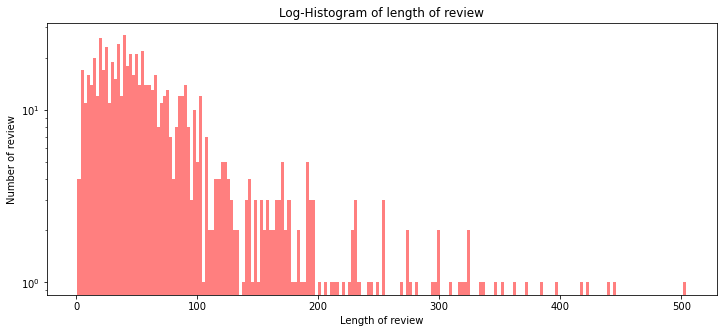

In [168]:
plt.figure(figsize=(12,5))
plt.hist(result_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

위의 결과를 봤을때 문장은 4글자 이상, 200이하는 정제한다. 

In [169]:
# 200 글자 이상 제거 
print(f'정제 전: {len(result_df)}')

result_df = result_df[result_df['text'].map(len) <= 200]
print(f'정제 후: {len(result_df)}')

정제 전: 722
정제 후: 675


In [170]:
# 4 글자 이하 제거 
print(f'정제 전: {len(result_df)}')

result_df = result_df[result_df['text'].map(len) >= 4]
print(f'정제 후: {len(result_df)}')

정제 전: 675
정제 후: 671


In [171]:
result_length = result_df['text'].apply(len)
result_length[:10]

0     64
1     93
2     37
3     90
4     48
5     69
6     37
7     66
8    123
9    195
Name: text, dtype: int64

/home/aiffel-dj19/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of review')

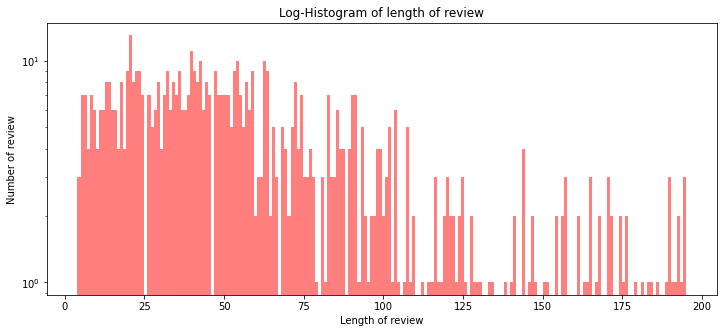

In [172]:
plt.figure(figsize=(12,5))
plt.hist(result_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [173]:
data_df['keyword'] = keyword_en
data_df.head()

,date,description,text,name,search,keyword
0,191018,이제 주말에 여유 생길 테니 자주 볼 수 있으면 좋겠다.^^ 2019대전 : 20개...,[2019 대전 20개월 아기와 함께 당일치기 여행 첫 차를 산 동생에게 친절한 형...,봄날,오월드 관광 주말에,oworld_zoo
1,190909,북촌으로 온 가족들과 손에 손을 맞잡고 국악축제 즐기러 가보세요! 저도 이번 주말 ...,"[이번 달은 우리나라의 큰 명절 중 하나인 추석이 있는 달이랍니다., 그렇기 때문에...",수하의 똑똑한 Blog,오월드 관광 주말에,oworld_zoo
2,190708,요 판매하는 저렴한 방문한 바로 맛있었어요.무엇보다 날은 인기 못지않고 섰어요.주말...,[보문산 보문산 목재 문화체험 대전관광지 맑음 대전의 남산이라고 있는 보문산 불리는...,kilmeboknu5님의블로그,오월드 관광 주말에,oworld_zoo
3,190628,com) □자료: 대전오월드 2019년 대전방문의 해를 맞아 대전시 관광 활성화를 ...,[7월을 앞두고 시원한 여름 나들이 계획에 한 창 설레고 있을 요즘 그동안 멀리 셔...,대전교차로닷컴,오월드 관광 주말에,oworld_zoo
4,190623,관광지 요금도 검색하신다면 다 나와요! ⑤ 효율적으로 코스 세우기 내일로 여행 중에...,"[안녕하세요., 오랜만에 찾아뵙는 제한입니다., 이 글은 7년 동안 내일로 44회 ...",솔솔의 매주 여행 이야기,오월드 관광 주말에,oworld_zoo


In [174]:
def saveCsv(root_path, key_en, df):
    print(f'저장 경로: {root_path}')
    df.to_csv(root_path+key_en+'_nv.csv', header=True, index=False)

In [175]:
save_path = os.path.join(os.getcwd(), 'filtered/naver_review/')
save_path

'/home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/naver_review/'

In [176]:
saveCsv(save_path, keyword_en, result_df)

저장 경로: /home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/naver_review/


In [177]:
!pwd
!ls /home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/naver_review

/home/aiffel-dj19/jungcheck/DataPreprocessing
oworld_zoo_nv.csv
